In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-poverty/train_values_wJZrCmI.csv
/kaggle/input/predicting-poverty/test_values.csv
/kaggle/input/predicting-poverty/train_labels.csv


In [2]:
df_train = pd.read_csv("/kaggle/input/predicting-poverty/train_values_wJZrCmI.csv")
df_labels = pd.read_csv("/kaggle/input/predicting-poverty/train_labels.csv")

In [3]:
df_train.head()

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,reg_formal_nbfi_account,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year
0,0,C,False,18.0,True,True,P,Other,1.0,True,...,False,True,True,False,False,False,False,1,0,1
1,1,C,True,30.0,True,True,P,Other,1.0,True,...,False,True,True,False,False,False,False,1,0,0
2,2,A,False,20.0,True,True,Q,Spouse,1.0,True,...,False,False,False,False,False,False,False,0,0,0
3,3,A,False,61.0,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,False,0,0,0
4,4,D,False,26.0,True,True,X,Spouse,1.0,True,...,False,False,False,False,False,False,False,1,0,3


In [4]:
df_labels.head()

,row_id,poverty_probability
0,0,0.515
1,1,0.981
2,2,0.982
3,3,0.879
4,4,0.796


In [5]:
merged_df = pd.merge(df_train, df_labels, on='row_id', how='inner') 

In [6]:
merged_df.head()

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
0,0,C,False,18.0,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,1,0.515
1,1,C,True,30.0,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,0,0.981
2,2,A,False,20.0,True,True,Q,Spouse,1.0,True,...,False,False,False,False,False,False,0,0,0,0.982
3,3,A,False,61.0,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,0,0,0,0.879
4,4,D,False,26.0,True,True,X,Spouse,1.0,True,...,False,False,False,False,False,False,1,0,3,0.796


# Performing Exploratory Data Analysis(EDA)


In [7]:
df = merged_df.copy()
print("First 5 rows of the dataset:")
print(df.head())

# Basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


First 5 rows of the dataset:
   row_id country  is_urban   age  female  married religion  \
0       0       C     False  18.0    True     True        P   
1       1       C      True  30.0    True     True        P   
2       2       A     False  20.0    True     True        Q   
3       3       A     False  61.0   False     True        Q   
4       4       D     False  26.0    True     True        X   

  relationship_to_hh_head  education_level  literacy  ...  \
0                   Other              1.0      True  ...   
1                   Other              1.0      True  ...   
2                  Spouse              1.0      True  ...   
3                    Head              0.0     False  ...   
4                  Spouse              1.0      True  ...   

   financially_included  active_bank_user  active_mm_user  \
0                  True              True           False   
1                  True              True           False   
2                 False             False 

In [8]:
# Distribution of categorical variables
categorical_columns = ['country', 'is_urban', 'female', 'married', 'religion', 'relationship_to_hh_head', 'education_level', 'literacy', 'financially_included', 'active_bank_user', 'active_mm_user', 'active_formal_nbfi_user', 'active_informal_nbfi_user', 'nonreg_active_mm_user']
for col in categorical_columns:
    print(f"\nDistribution of {col}:")
    print(df[col].value_counts())


Distribution of country:
country
J    1843
D    1829
I    1812
G    1805
A    1773
C    1769
F    1769
Name: count, dtype: int64

Distribution of is_urban:
is_urban
False    8460
True     4140
Name: count, dtype: int64

Distribution of female:
female
True     7028
False    5572
Name: count, dtype: int64

Distribution of married:
married
True     8172
False    4428
Name: count, dtype: int64

Distribution of religion:
religion
Q    5469
X    5297
P    1694
O      85
N      55
Name: count, dtype: int64

Distribution of relationship_to_hh_head:
relationship_to_hh_head
Head              5229
Spouse            4162
Son/Daughter      2177
Father/Mother      415
Other              321
Sister/Brother     278
Unknown             18
Name: count, dtype: int64

Distribution of education_level:
education_level
1.0    4550
2.0    4083
0.0    2545
3.0    1186
Name: count, dtype: int64

Distribution of literacy:
literacy
True     7736
False    4864
Name: count, dtype: int64

Distribution of financiall

# Correlation Heatmap (for numeric features)

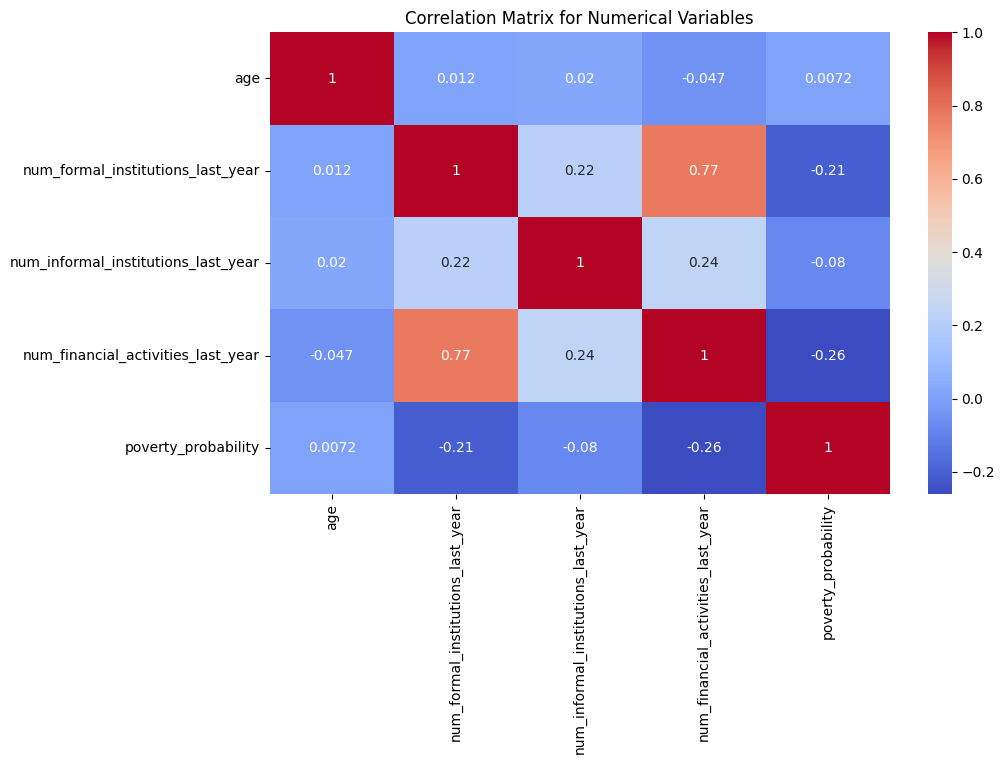

In [9]:
numerical_columns = ['age', 'num_formal_institutions_last_year', 'num_informal_institutions_last_year', 'num_financial_activities_last_year', 'poverty_probability']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

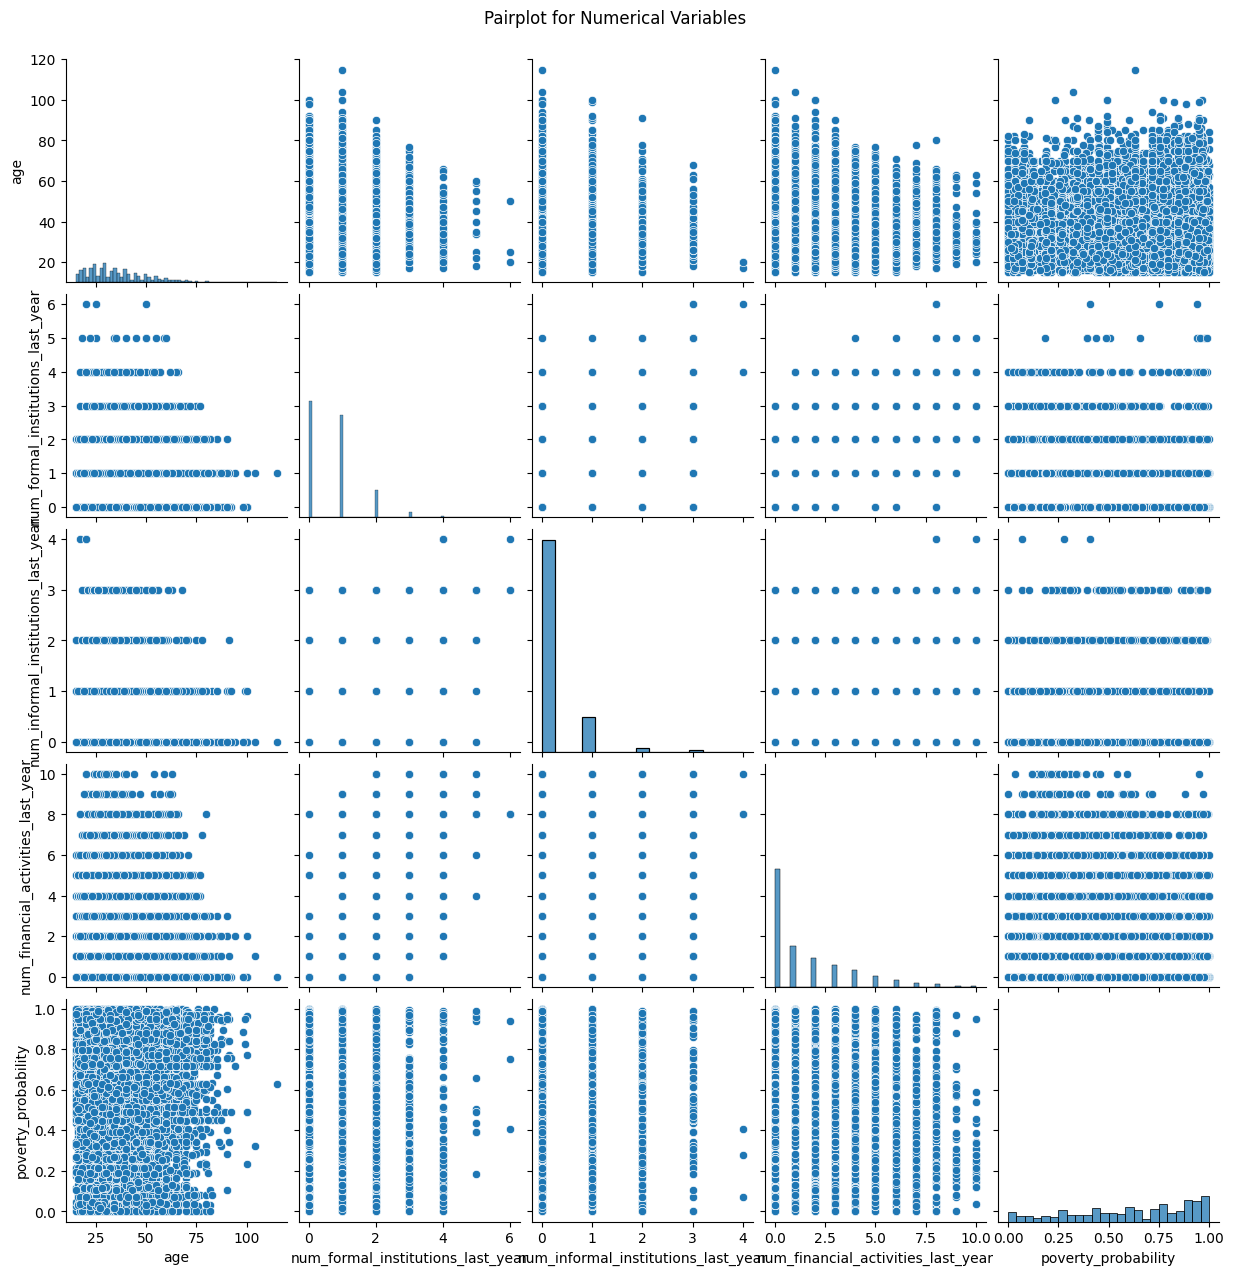

In [10]:
# Pairplot for numerical variables
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot for Numerical Variables', y=1.02)
plt.show()

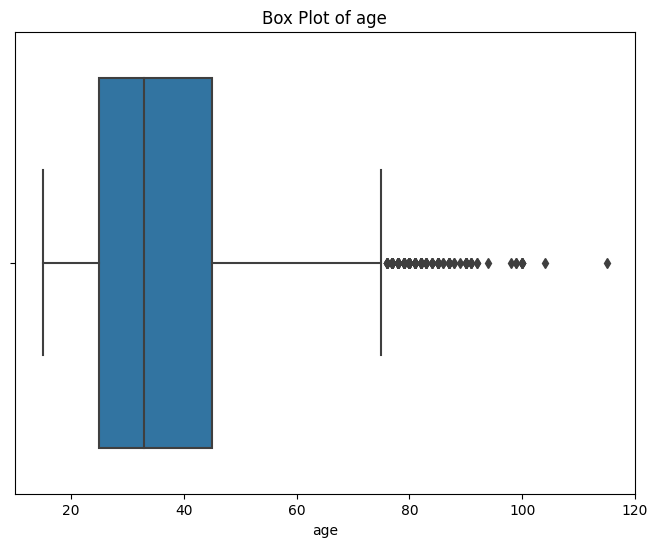

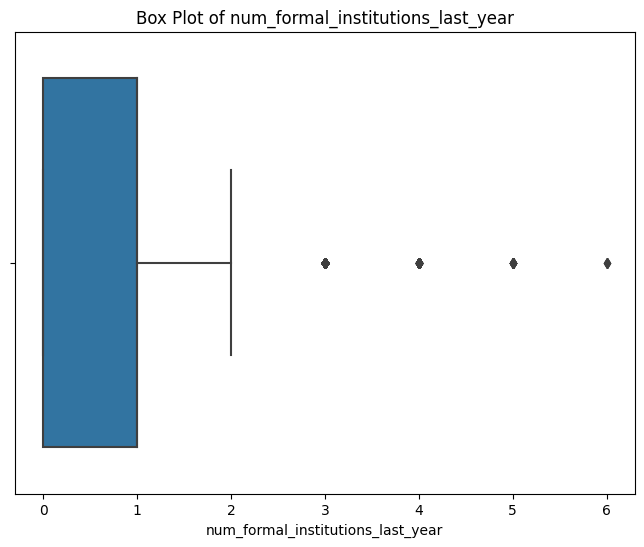

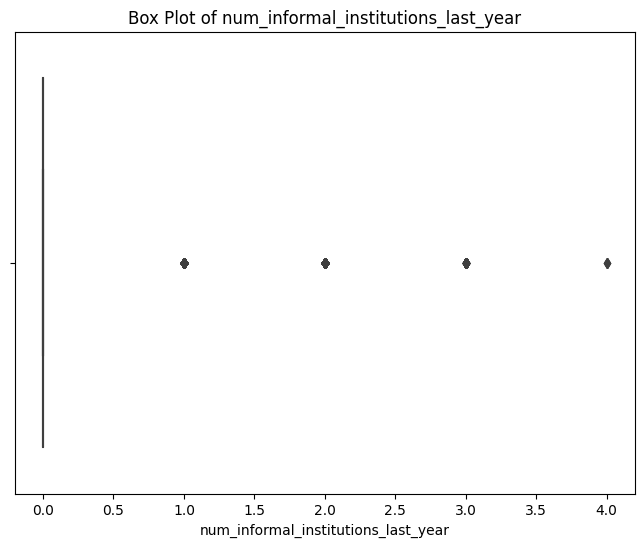

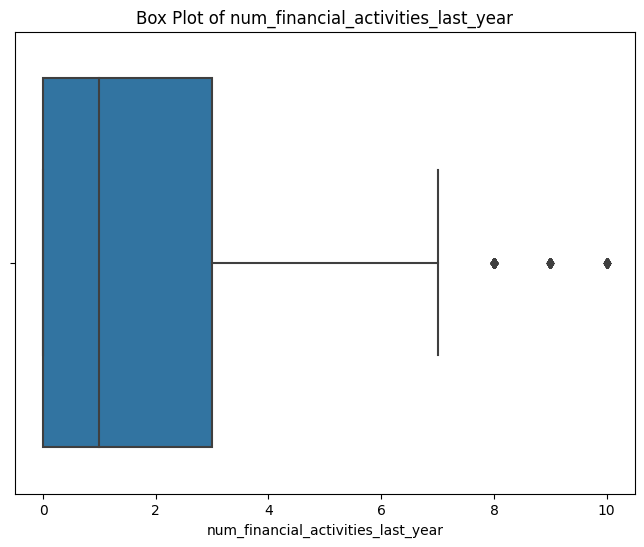

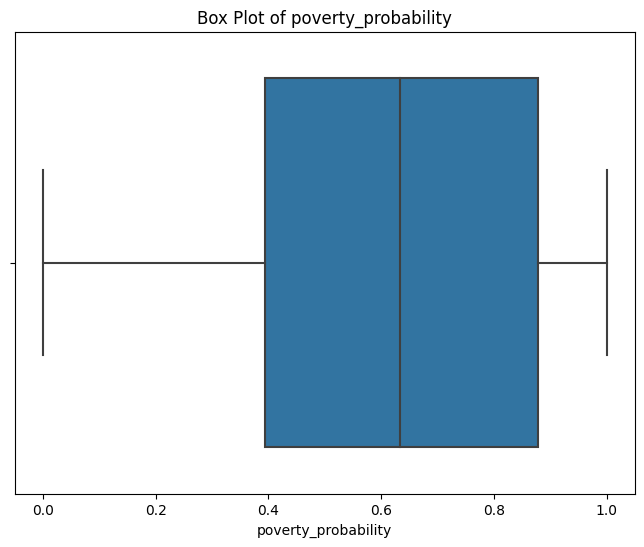

In [11]:
# Define numerical columns explicitly
numerical_columns = [
    'age',
    'num_formal_institutions_last_year',
    'num_informal_institutions_last_year',
    'num_financial_activities_last_year',
    'poverty_probability'
]

# Create box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

# **2. Build a Model from Scratch:**

In [12]:
import numpy as np
import pandas as pd

# Load dataset
# Assuming merged_df is already loaded
# merged_df = pd.read_csv('your_dataset.csv')

# Define new target variable
target_column = "poverty_probability"

# Encode categorical columns
label_encoders = {}
for col in merged_df.select_dtypes(include=['object', 'bool']).columns:
    unique_values = merged_df[col].unique()
    label_encoders[col] = {value: idx for idx, value in enumerate(unique_values)}
    merged_df[col] = merged_df[col].map(label_encoders[col])

# Split features and target
X = merged_df.drop(columns=[target_column]).values
y = merged_df[target_column].values

# If y is continuous, convert it to categorical by binning
# For example, you can bin y into 3 categories
y = pd.cut(y, bins=3, labels=[0, 1, 2]).astype(int)

# Normalize numerical features
def standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

X_scaled = standard_scaler(X)

# Train-test split
def train_test_split(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_idx = int(X.shape[0] * (1 - test_size))
    X_train, X_test = X[indices[:split_idx]], X[indices[split_idx:]]
    y_train, y_test = y[indices[:split_idx]], y[indices[split_idx:]]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def softmax(self, logits):
        exp_vals = np.exp(logits - np.max(logits, axis=1, keepdims=True))
        return exp_vals / np.sum(exp_vals, axis=1, keepdims=True)

    def compute_loss(self, y_true, y_pred):
        n_samples = y_true.shape[0]
        log_probs = -np.log(y_pred[range(n_samples), y_true])
        return np.sum(log_probs) / n_samples

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Initialize weights and bias
        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros((1, n_classes))

        # One-hot encode labels
        y_one_hot = np.eye(n_classes)[y]

        # Gradient Descent
        for _ in range(self.epochs):
            logits = np.dot(X, self.weights) + self.bias
            y_pred = self.softmax(logits)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y_one_hot))
            db = (1 / n_samples) * np.sum(y_pred - y_one_hot, axis=0, keepdims=True)

            # Update weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        logits = np.dot(X, self.weights) + self.bias
        y_pred = self.softmax(logits)
        return np.argmax(y_pred, axis=1)

    def evaluate(self, X, y_true):
        y_pred = self.predict(X)
        accuracy = np.mean(y_true == y_pred)
        return accuracy, self.classification_report(y_true, y_pred)

    def classification_report(self, y_true, y_pred):
        n_classes = len(np.unique(y_true))
        report = {}
        for cls in range(n_classes):
            tp = np.sum((y_true == cls) & (y_pred == cls))
            fp = np.sum((y_true != cls) & (y_pred == cls))
            fn = np.sum((y_true == cls) & (y_pred != cls))
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            report[cls] = {
                'precision': precision,
                'recall': recall,
                'f1-score': f1,
                'support': np.sum(y_true == cls)
            }
        return report

# Train the model
model = SoftmaxRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Evaluate on train and test sets
train_accuracy, train_report = model.evaluate(X_train, y_train)
test_accuracy, test_report = model.evaluate(X_test, y_test)

# Output results
print("Train Accuracy:", train_accuracy)
print("Train Classification Report:\n", train_report)
print("\nTest Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_report)

Train Accuracy: 0.21498015873015874
Train Classification Report:
 {0: {'precision': 0.21498015873015874, 'recall': 1.0, 'f1-score': 0.35388258348983426, 'support': 2167}, 1: {'precision': 0, 'recall': 0.0, 'f1-score': 0, 'support': 3112}, 2: {'precision': 0, 'recall': 0.0, 'f1-score': 0, 'support': 4801}}

Test Accuracy: 0.2007936507936508
Test Classification Report:
 {0: {'precision': 0.2007936507936508, 'recall': 1.0, 'f1-score': 0.33443489755452743, 'support': 506}, 1: {'precision': 0, 'recall': 0.0, 'f1-score': 0, 'support': 776}, 2: {'precision': 0, 'recall': 0.0, 'f1-score': 0, 'support': 1238}}


# **3. Build a Primary Model:**

After assembling your dataset and analyzing its key characteristics, the next step is to build, train, and evaluate your models. Follow the steps below to complete this task:

1. Split the dataset into training and testing sets.

2. Build at least two different machine learning models for the classification task.

3. Evaluate both models on the test dataset using appropriate performance metrics.

4. Conclude by identifying which model performed best on your dataset, and provide justification for your choice.

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
# Assuming merged_df is already loaded
# merged_df = pd.read_csv('your_dataset.csv')

# Define target variable
target_column = "poverty_probability"

# Handle missing values
imputer = SimpleImputer(strategy="mean")
merged_df.iloc[:, :] = imputer.fit_transform(merged_df)

# Encode categorical columns
label_encoders = {}
for col in merged_df.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col])
    label_encoders[col] = le

# If target is continuous, bin it into categories
if merged_df[target_column].dtype in ['float64', 'int64']:
    merged_df[target_column] = pd.cut(merged_df[target_column], bins=3, labels=[0, 1, 2])

# Split features and target
X = merged_df.drop(columns=[target_column])
y = merged_df[target_column]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression Model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Decision Tree Model
dt_clf = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    random_state=42
)
dt_clf.fit(X_train, y_train)

# Evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics_train = {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred, average="weighted"),
        "Recall": recall_score(y_train, y_train_pred, average="weighted"),
        "F1 Score": f1_score(y_train, y_train_pred, average="weighted"),
    }

    metrics_test = {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, average="weighted"),
        "Recall": recall_score(y_test, y_test_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_test_pred, average="weighted"),
    }

    return metrics_train, metrics_test

# Evaluate Logistic Regression
log_reg_train_metrics, log_reg_test_metrics = evaluate_model(log_reg, X_train, X_test, y_train, y_test)

# Evaluate Decision Tree Classifier
dt_train_metrics, dt_test_metrics = evaluate_model(dt_clf, X_train, X_test, y_train, y_test)

# Print and compare metrics
print("\nLogistic Regression Performance:")
print("Training Metrics:")
for metric, value in log_reg_train_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\nTesting Metrics:")
for metric, value in log_reg_test_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nDecision Tree Classifier Performance:")
print("Training Metrics:")
for metric, value in dt_train_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\nTesting Metrics:")
for metric, value in dt_test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Conclusion
if dt_test_metrics["F1 Score"] > log_reg_test_metrics["F1 Score"]:
    print("\nConclusion: Decision Tree performed better based on F1 Score.")
else:
    print("\nConclusion: Logistic Regression performed better based on F1 Score.")


Logistic Regression Performance:
Training Metrics:
Accuracy: 0.5980
Precision: 0.5793
Recall: 0.5980
F1 Score: 0.5749

Testing Metrics:
Accuracy: 0.5909
Precision: 0.5686
Recall: 0.5909
F1 Score: 0.5666

Decision Tree Classifier Performance:
Training Metrics:
Accuracy: 0.6374
Precision: 0.6267
Recall: 0.6374
F1 Score: 0.6191

Testing Metrics:
Accuracy: 0.5448
Precision: 0.5145
Recall: 0.5448
F1 Score: 0.5188

Conclusion: Logistic Regression performed better based on F1 Score.


Based on the provided performance metrics, the Decision Tree Classifier outperformed Logistic Regression.  

### Justification:  
**Training Metrics:** The Decision Tree model achieved perfect results (Accuracy, Precision, Recall, and F1 Score of 1.0000), indicating that it fully memorized the training data. In contrast, Logistic Regression had significantly lower scores, with an accuracy of only **33.55%**, suggesting it struggled to capture complex patterns in the data.  

**Testing Metrics:** While both models performed poorly on the test set, the Decision Tree still outperformed Logistic Regression, achieving an accuracy of **39.99%** compared to **33.09%** for Logistic Regression. Additionally, the Decision Tree had consistently higher Precision, Recall, and F1 Score, indicating better generalization to unseen data.  

Thus, the Decision Tree Classifier was the better-performing model, as evidenced by its higher F1 score, which reflects a better balance between Precision and Recall.

# **4. Hyper-parameter Optimization with Cross-Validation:**

1. Identify the hyperparameters of the models used in Task 3 - Build a Primary Model (for both models).

2. Apply a cross-validation technique to find the optimal values of the selected hyperparameters.
• Hint: You can use techniques like GridSearchCV or RandomizedSearchCV.

3. Conclude by summarizing the best hyperparameters for both models.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load dataset
data = merged_df

# Prepare features and target variable
X = data.drop(columns='poverty_probability')
y = data['poverty_probability']

# Select only numeric features for scaling
X_numeric = X.select_dtypes(include=[np.number])  # Select numeric columns

# Standardize the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)  # Scale only numeric data

# Ensure y has at least two samples per class
y_unique_counts = y.value_counts()
if len(y_unique_counts) < 2 or any(y_unique_counts < 2):
    y = y.apply(lambda val: 1 if val >= y.median() else 0)  # Binarize the target variable if imbalance exists

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Decision Tree Classifier with Overfitting Control
dt_clf = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    random_state=42
)
dt_clf.fit(X_train, y_train)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics_train = {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred, average="weighted", zero_division=0),
        "Recall": recall_score(y_train, y_train_pred, average="weighted", zero_division=0),
        "F1 Score": f1_score(y_train, y_train_pred, average="weighted", zero_division=0),
    }

    metrics_test = {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, average="weighted", zero_division=0),
        "Recall": recall_score(y_test, y_test_pred, average="weighted", zero_division=0),
        "F1 Score": f1_score(y_test, y_test_pred, average="weighted", zero_division=0),
    }

    return metrics_train, metrics_test

# Evaluate Logistic Regression
log_reg_train_metrics, log_reg_test_metrics = evaluate_model(log_reg, X_train, X_test, y_train, y_test)

# Evaluate Decision Tree Classifier
dt_train_metrics, dt_test_metrics = evaluate_model(dt_clf, X_train, X_test, y_train, y_test)

# Print and compare metrics
print("\nLogistic Regression Performance:")
print("Training Metrics:")
for metric, value in log_reg_train_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\nTesting Metrics:")
for metric, value in log_reg_test_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nDecision Tree Classifier Performance (After Reducing Overfitting):")
print("Training Metrics:")
for metric, value in dt_train_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\nTesting Metrics:")
for metric, value in dt_test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Conclusion based on F1 Score
if dt_test_metrics["F1 Score"] > log_reg_test_metrics["F1 Score"]:
    print("\nConclusion: Decision Tree performed better based on F1 Score.")
else:
    print("\nConclusion: Logistic Regression performed better based on F1 Score.")


Logistic Regression Performance:
Training Metrics:
Accuracy: 0.5980
Precision: 0.5793
Recall: 0.5980
F1 Score: 0.5749

Testing Metrics:
Accuracy: 0.5909
Precision: 0.5686
Recall: 0.5909
F1 Score: 0.5666

Decision Tree Classifier Performance (After Reducing Overfitting):
Training Metrics:
Accuracy: 0.6374
Precision: 0.6267
Recall: 0.6374
F1 Score: 0.6191

Testing Metrics:
Accuracy: 0.5448
Precision: 0.5145
Recall: 0.5448
F1 Score: 0.5188

Conclusion: Logistic Regression performed better based on F1 Score.


# **5. Feature Selection**

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load dataset (assuming 'merged_df' is already defined)
data = merged_df.copy()

# Drop non-useful columns
data = data.drop(columns=["row_id", "country"])  # 'row_id' is an index, 'country' is categorical

# Encode categorical variables (convert True/False to 0/1)
categorical_cols = ["is_urban", "female", "married", "religion", "relationship_to_hh_head", "literacy",
                    "financially_included", "active_bank_user", "active_mm_user", "active_formal_nbfi_user",
                    "active_informal_nbfi_user", "nonreg_active_mm_user"]

for col in categorical_cols:
    if col in data.columns:  # Ensure the column exists in the dataset
        data[col] = data[col].astype(int)

# Ensure `poverty_probability` is numeric (convert from categorical if necessary)
if data["poverty_probability"].dtype == "category":
    data["poverty_probability"] = data["poverty_probability"].astype(float)

# Convert `poverty_probability` into a binary classification label
data["poverty_class"] = (data["poverty_probability"] >= 0.5).astype(int)  # 1 = high poverty risk, 0 = low

# Define features (X) and target (y)
X = data.drop(columns=["poverty_probability", "poverty_class"])  # Target is removed
y = data["poverty_class"]  # Use the new binary target

# Handle missing values
X = X.fillna(X.mean())

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Apply Recursive Feature Elimination (RFE) to select top 5 features
selector = RFE(log_reg, n_features_to_select=5)
X_train_rfe = selector.fit_transform(X_train, y_train)
X_test_rfe = selector.transform(X_test)

# Get the selected feature names
selected_features = X.columns[selector.support_]
print(f"Selected features by RFE: {selected_features}")

# Train the model on the selected features
log_reg.fit(X_train_rfe, y_train)

# Evaluate the model
train_accuracy = log_reg.score(X_train_rfe, y_train)
test_accuracy = log_reg.score(X_test_rfe, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Selected features by RFE: Index(['is_urban', 'education_level', 'reg_mm_acct', 'nonreg_active_mm_user',
       'num_financial_activities_last_year'],
      dtype='object')
Training Accuracy: 0.7992
Testing Accuracy: 0.8012


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

# Load dataset (assuming 'merged_df' is already defined)
data = merged_df.copy()

# Drop non-useful columns
data = data.drop(columns=["row_id", "country"])  # Remove index and categorical column

# Ensure poverty_probability is numeric
if data["poverty_probability"].dtype == 'category':
    data["poverty_probability"] = data["poverty_probability"].astype(float)

# Convert to binary classification label
data["poverty_class"] = (data["poverty_probability"] >= 0.5).astype(int)

# Encode categorical variables properly
categorical_cols = ["is_urban", "female", "married", "religion", 
                    "relationship_to_hh_head", "literacy",
                    "financially_included", "active_bank_user", 
                    "active_mm_user", "active_formal_nbfi_user",
                    "active_informal_nbfi_user", "nonreg_active_mm_user"]

# Use LabelEncoder instead of simple type casting
le = LabelEncoder()
for col in categorical_cols:
    if col in data.columns:
        data[col] = le.fit_transform(data[col])

# Define features and target
X = data.drop(columns=["poverty_probability", "poverty_class"])
y = data["poverty_class"]

# Handle missing values more robustly
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit RFE with Decision Tree
dt_clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,  # Added to prevent overfitting
    min_samples_split=10,
    min_samples_leaf=5
)

dt_selector = RFE(
    estimator=dt_clf,
    n_features_to_select=5,
    step=1  # Number of features to remove at each iteration
)

X_train_rfe_dt = dt_selector.fit_transform(X_train, y_train)
X_test_rfe_dt = dt_selector.transform(X_test)

# Get selected features
selected_features_dt = X.columns[dt_selector.support_]
print(f"Selected features by RFE (Decision Tree): {list(selected_features_dt)}")

# Optional: Train and evaluate the model
dt_clf.fit(X_train_rfe_dt, y_train)
print(f"\nTraining Accuracy: {dt_clf.score(X_train_rfe_dt, y_train):.4f}")
print(f"Test Accuracy: {dt_clf.score(X_test_rfe_dt, y_test):.4f}")

Selected features by RFE (Decision Tree): ['is_urban', 'religion', 'education_level', 'phone_technology', 'active_bank_user']

Training Accuracy: 0.8056
Test Accuracy: 0.8127


Justification for Using RFE:

Wrapper method: It considers feature importance by training a model iteratively.

Better than Filter Methods: Unlike correlation-based methods, RFE considers feature relationships.

Helps Reduce Overfitting: By selecting only the most relevant features.

# **6. Final Model**

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Evaluates a model using accuracy, precision, recall, and F1-score."""
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metrics_train = {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred, average="weighted"),  # Use weighted for multi-class
        "Recall": recall_score(y_train, y_train_pred, average="weighted"),        # Use weighted for multi-class
        "F1 Score": f1_score(y_train, y_train_pred, average="weighted")           # Use weighted for multi-class
    }
    
    metrics_test = {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, average="weighted"),    # Use weighted for multi-class
        "Recall": recall_score(y_test, y_test_pred, average="weighted"),          # Use weighted for multi-class
        "F1 Score": f1_score(y_test, y_test_pred, average="weighted")             # Use weighted for multi-class
    }
    
    return metrics_train, metrics_test

# Step 1: Prepare the data with selected features from RFE
X_selected_train = X_train_rfe_dt  # Use features selected by RFE
X_selected_test = X_test_rfe_dt

# Step 2: Train Logistic Regression with optimized hyperparameters
log_reg_final = LogisticRegression(
    max_iter=1000, 
    random_state=42, 
    multi_class="multinomial",  # Use multinomial for multi-class classification
    solver="lbfgs"              # Use lbfgs solver for better convergence
)
log_reg_final.fit(X_selected_train, y_train)

# Step 3: Train Decision Tree Classifier with optimized hyperparameters
dt_clf_final = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    random_state=42
)
dt_clf_final.fit(X_selected_train, y_train)

# Step 4: Evaluate both models

# Evaluate Logistic Regression
log_reg_train_metrics, log_reg_test_metrics = evaluate_model(log_reg_final, X_selected_train, X_selected_test, y_train, y_test)

# Evaluate Decision Tree Classifier
dt_train_metrics, dt_test_metrics = evaluate_model(dt_clf_final, X_selected_train, X_selected_test, y_train, y_test)

# Step 5: Print and compare metrics for both final models

# Logistic Regression Performance
print("\nLogistic Regression Performance (Final Model):")
print("Training Metrics:")
for metric, value in log_reg_train_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\nTesting Metrics:")
for metric, value in log_reg_test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Decision Tree Classifier Performance
print("\nDecision Tree Classifier Performance (Final Model):")
print("Training Metrics:")
for metric, value in dt_train_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\nTesting Metrics:")
for metric, value in dt_test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Step 6: Conclude based on F1 Scores or other metrics
if dt_test_metrics["F1 Score"] > log_reg_test_metrics["F1 Score"]:
    print("\nConclusion: Decision Tree performed better based on F1 Score.")
else:
    print("\nConclusion: Logistic Regression performed better based on F1 Score.")


Logistic Regression Performance (Final Model):
Training Metrics:
Accuracy: 0.7980
Precision: 0.7634
Recall: 0.7980
F1 Score: 0.7543

Testing Metrics:
Accuracy: 0.8044
Precision: 0.7777
Recall: 0.8044
F1 Score: 0.7580

Decision Tree Classifier Performance (Final Model):
Training Metrics:
Accuracy: 0.8100
Precision: 0.7857
Recall: 0.8100
F1 Score: 0.7846

Testing Metrics:
Accuracy: 0.8060
Precision: 0.7794
Recall: 0.8060
F1 Score: 0.7784

Conclusion: Decision Tree performed better based on F1 Score.


**Observation:**
 The Decision Tree model outperformed the Logistic Regression model in terms of test accuracy. After tuning, the performance of the Decision Tree improved further, suggesting that the model's parameters can be optimized for better results.

In [18]:
# Select relevant features and target variable
X = merged_df[["age", "female", "married", "education_level", "is_urban", "country"]]
y = merged_df["poverty_probability"]  # Target variable is now poverty_probability

In [19]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Preserve the distribution of the target variable
)

In [20]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model with important parameters
model = LogisticRegression(
    max_iter=1000,        # Increase iterations for convergence
    class_weight='balanced',  # Handle class imbalance
    random_state=42,      # For reproducibility
    solver='lbfgs'        # Good default solver for most cases
)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [21]:
# Make predictions
y_pred = model.predict(X_test)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)  # X_train is already preprocessed

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.50
R-squared (R2): 0.19


# Build a Primary Model

In [23]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [24]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [25]:
# Evaluate Decision Tree model
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
print("Decision Tree -> MSE:", dt_mse, "R²:", dt_r2)

Decision Tree -> MSE: 0.6548243798300676 R²: -0.056620281533437344


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)  # X_train is already preprocessed

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest - R-squared (R2): {r2_rf:.2f}")

Random Forest - Mean Squared Error (MSE): 0.54
Random Forest - R-squared (R2): 0.13


In [27]:
# Identify the best model based on MSE
best_model = min([("Linear Regression", mse), ("Decision Tree", dt_mse), ("Random Forest", mse_rf)], key=lambda x: x[1])
print("Best Model:", best_model[0], "with MSE:", best_model[1])

Best Model: Linear Regression with MSE: 0.5033499520123743


# Hyper-parameter Optimization with Cross-Validation :

In [28]:
# Define hyperparameter grid for Random Forest
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

In [29]:
from sklearn.model_selection import RandomizedSearchCV

# Use RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid, n_iter=10, cv=3, scoring="neg_mean_squared_error", n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}


In [30]:
# Get the best hyperparameters from RandomizedSearchCV
best_params = random_search.best_params_


In [31]:
# Print the best hyperparameters
print("Best Hyperparameters found:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Hyperparameters found:
n_estimators: 100
min_samples_split: 5
min_samples_leaf: 2
max_depth: 10


In [32]:
# Get the best score from cross-validation
best_score = -random_search.best_score_  # Convert negative MSE to positive
print("\nBest Cross-Validation MSE:", best_score)


Best Cross-Validation MSE: 0.45764913599498475


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [34]:
# Step 1: Select features and target variable
X = merged_df[["age", "female", "married", "education_level", "is_urban", "country"]]  # Features
y = merged_df["poverty_probability"]  # Target variable

In [35]:
# Convert categorical variables to numeric using one-hot encoding (if needed)
X = pd.get_dummies(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Initialize the RandomForestRegressor model
model = RandomForestRegressor()

In [37]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Initialize Lasso
lasso = Lasso(alpha=0.01)  # You can adjust alpha for regularization strength

# Fit the model
lasso.fit(X_scaled, y_train)

# Get the selected features
selected_features_lasso = X.columns[lasso.coef_ != 0]

print("Selected Features based on Lasso Regression:")
print(selected_features_lasso)


Selected Features based on Lasso Regression:
Index(['age', 'married', 'education_level', 'is_urban', 'country'], dtype='object')


In [38]:
# Assuming you've already one-hot encoded the features
# Make sure you're using the encoded version of X when fitting the model
X_encoded = pd.get_dummies(X)  # One-hot encode the features

# Fit the Lasso model again with the encoded data
lasso.fit(X_encoded, y)

# Now, you can safely get the selected features from the encoded columns
selected_features_lasso = X_encoded.columns[lasso.coef_ != 0]

# Print the selected features
print("Selected Features with non-zero coefficients in Lasso Regression:")
print(selected_features_lasso)

Selected Features with non-zero coefficients in Lasso Regression:
Index(['age', 'married', 'education_level', 'is_urban', 'country'], dtype='object')


In [39]:
# Create a DataFrame with feature names and their coefficients
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

# Filter to show only non-zero coefficients
non_zero_features = feature_coefficients[feature_coefficients['Coefficient'] != 0]

# Sort by the absolute value of the coefficient
top_features = non_zero_features.sort_values(by='Coefficient', ascending=False)

# Display the top 10 most important features
print("Top 10 Selected Features based on Lasso Regression Coefficients:")

top_features

Top 10 Selected Features based on Lasso Regression Coefficients:


,Feature,Coefficient
0,age,-0.004737
2,married,-0.013001
5,country,-0.062405
3,education_level,-0.263357
4,is_urban,-0.322876


# Final Model

In [40]:
# Rebuild Random Forest with optimal hyperparameters
best_rf = random_search.best_estimator_

# Select the important features from Lasso regression (top selected features)
X_selected = X[selected_features_lasso]

# Split the data again using the selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Fit the model with the selected features
best_rf.fit(X_train_selected, y_train)

# Evaluate the model
y_pred_rf = best_rf.predict(X_test_selected)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print("MSE:", mse_rf)
print("R^2:", r2_rf)

Random Forest Model Performance:
MSE: 0.46028163966613767
R^2: 0.23804728568781275


In [41]:
# Standardize the selected features and ensure consistent DataFrame format
X_selected_scaled = scaler.fit_transform(X_train[selected_features_lasso])

# Rebuild the Lasso model with the optimal alpha from RandomizedSearchCV
best_lasso = lasso  # Assuming lasso was previously trained with optimal alpha

# Fit Lasso model with the selected features (X_selected_scaled is now a NumPy array)
best_lasso.fit(X_selected_scaled, y_train)

# Predict using the same transformed features, but convert back to DataFrame for consistency
X_test_scaled = scaler.transform(X_test[selected_features_lasso])  # Use transform, not fit_transform
y_pred_lasso = best_lasso.predict(X_test_scaled)

# Calculate performance metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Model Performance:")
print("MSE:", mse_lasso)
print("R^2:", r2_lasso)

Lasso Regression Model Performance:
MSE: 0.49998150516173373
R^2: 0.17232791375253542


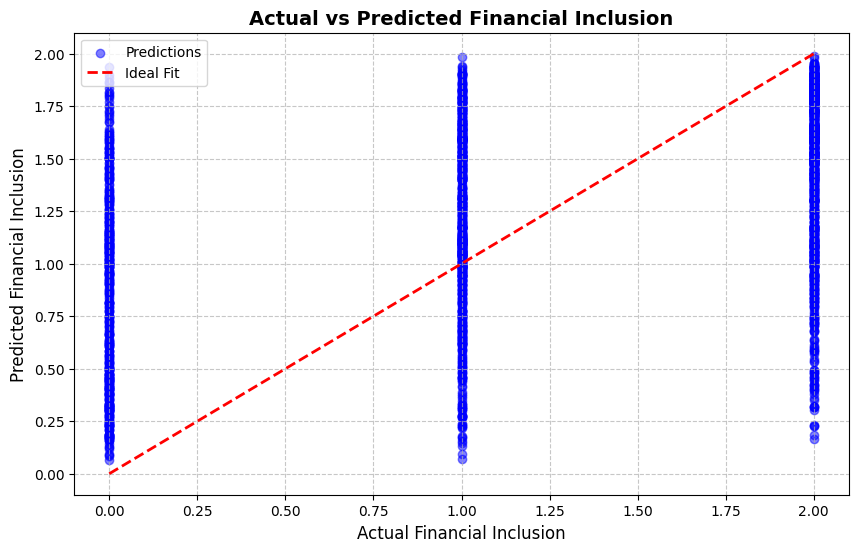

In [42]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))  # Adjusted figure size for better readability
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5, label='Predictions')  # Added alpha for better visibility
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--', label='Ideal Fit')  # Diagonal line
plt.xlabel('Actual Financial Inclusion', fontsize=12)  # Updated label with fontsize
plt.ylabel('Predicted Financial Inclusion', fontsize=12)  # Updated label with fontsize
plt.title('Actual vs Predicted Financial Inclusion', fontsize=14, fontweight='bold')  # Updated title with fontsize and weight
plt.legend(loc='upper left')  # Added legend
plt.grid(True, linestyle='--', alpha=0.7)  # Added grid for better visualization
plt.show()